# Mount your drive
* Please Use GPU

In [1]:
##! git clone https://github.com/Hesam-92-19/CAVAIE_Paper_Codes

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Utils Notebook which is called in this cell contains all the functions needed to carry out the TL.

In [3]:
import sys
global path_M
Folder_N='Test'
path_M = "/content/drive/My Drive/"+Folder_N+"/"
sys.path.append(path_M)
%cd /content/drive/My\ Drive/Test
%run Utils.ipynb
%cd

## Select your precision level (Float 10^-40 (max S=40), Double 10^-80 (max S=80))
#Prec='Float'
#Precision=40
Prec='Double'
Precision=80
torch.set_default_tensor_type('torch.cuda.'+Prec+'Tensor')



/content/drive/My Drive/Test
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/root


# Source Detector
* Note that Z24 has twice N and half W compared to QUGS and Yellow frame. But for index compatibility in writing codes here, for instance, if Z24 has $W=1000$ ans $N=30$, it is labeled as $W$=2000 and $N=15$. Recall that for the transfer all is needed is the same W*N

In [ ]:
SourceK()
NK()
WK()

interactive(children=(Dropdown(description='Source Class', options=('Yellow', 'QUGS', 'Z24'), style=Descriptio…

interactive(children=(Dropdown(description='Source N', options=('15', '10', '6'), style=DescriptionStyle(descr…

interactive(children=(Dropdown(description='Source W', options=('2000', '1000', '500'), style=DescriptionStyle…

# Source Detector
* Load Source Detector and its Spectrum


In [ ]:
1999checkpoint

In [ ]:
exec('D = CustomNeuralNetworkS%s().to(device)'%(str(N)))
checkpoint =torch.load(os.path.join("/content/drive/MyDrive/7thTopic/"+Source+"/LSTM"+str(NS_D)+"_"+str(WS_D)+"/DC1"+"/"+"1999checkpoint.pth"))
D.load_state_dict(checkpoint['D'])
Spec=checkpoint['Spec']


# Select Taget
* If you select the Traget as Source, then the Source Detector performance on it domain is later plotted

In [ ]:
SourceKT()

interactive(children=(Dropdown(description='Target Class', options=('Yellow', 'QUGS', 'Z24'), style=Descriptio…

# Load Target Data
By selecting the Traget the following data is imported:
* DM=features
* CLass_CLT= Class sizes (number of data points)
* E1T, ZopT = Cummulative Class_CLT for plot purposes

In [ ]:
[DMT, Data_CLT, E1T, ZopT]=Load_Data(Target,NS_D,WS_D,path_M)
[DMS, ZetS, E1S, ZopS]=Load_Data(Source,NS_D,WS_D,path_M)

#Transfer Learning-Binary SDD

0.17968610618174027 0.20796325661089451
SDD results with Damage class:	 1


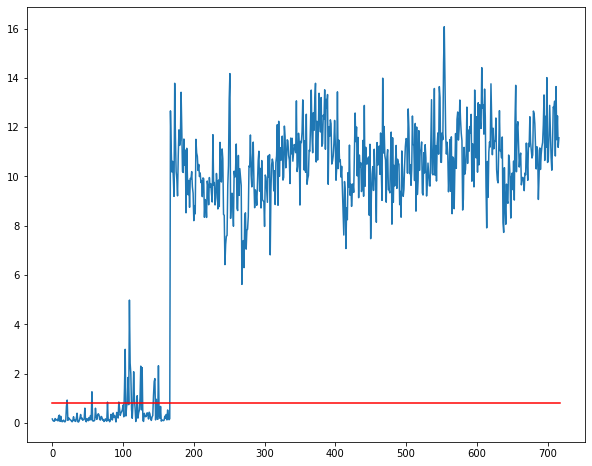

T:	 0.8035758760144238 FP:	 21 TP:	 550 FN:	 0 TN:	 146
Precision=  [0.96322242] Recall=  [1.] F1= [0.98126673] 



0.17968610618174027 0.20796325661089451
SDD results with Damage class:	 2


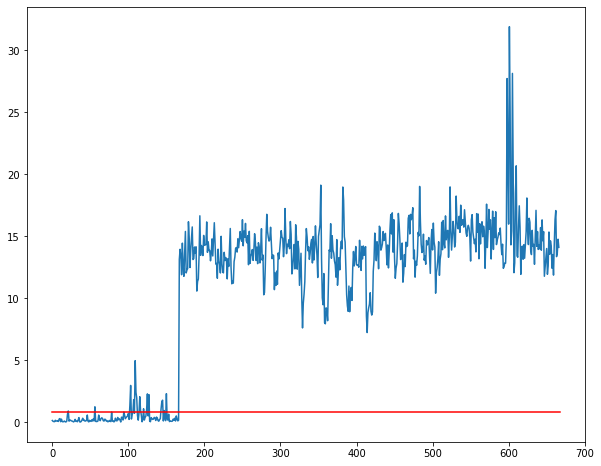

T:	 0.8035758760144238 FP:	 21 TP:	 500 FN:	 0 TN:	 146
Precision=  [0.9596929] Recall=  [1.] F1= [0.97943193] 



0.17968610618174027 0.20796325661089451
SDD results with Damage class:	 3


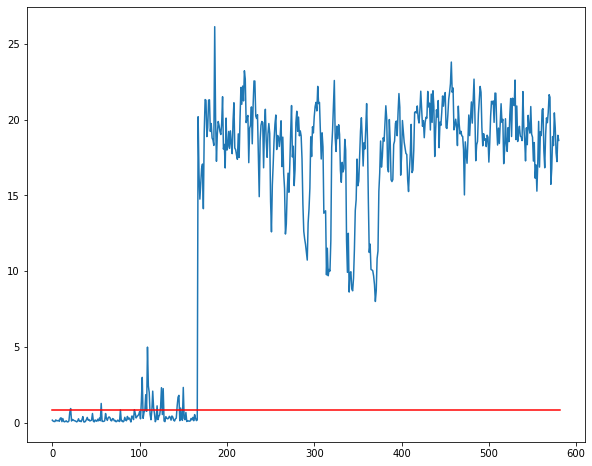

T:	 0.8035758760144238 FP:	 21 TP:	 414 FN:	 0 TN:	 146
Precision=  [0.95172414] Recall=  [1.] F1= [0.97526502] 





KeyboardInterrupt: ignored

In [ ]:
CL=len(E1T)-1
PP=np.zeros((CL,1))
RR=np.zeros((CL,1))
FF=np.zeros((CL,1))
E1=np.copy(E1T)
for Class in range(1,CL):
  DM=DMT
  W=WS_D
  S=NS_D
  Zet=np.copy(Data_CLT)
  E1Q=np.copy(E1T)
  Source_Spectrum=Spec
  Precision=80
  TL="True"
  Plot=False
  if Target.find("Z24")==-1:
    Coef=0.1
  else:
    Coef=0.5
  Coef2=0.4
  D_initiation=np.array([E1,np.zeros((len(E1)))])
  if TL=="False":
    Zet=np.array([0,int(E1Q[1])-int(E1Q[1]*Coef),E1Q[Class+1]-E1Q[Class]])
    Zet
    print('TL results without FT\n')
    E1QS=np.cumsum(E1Q)
    DOLO=np.concatenate((DM[int(E1Q[1]*Coef):int(E1Q[1]),:],DM[int(E1Q[Class]):int(E1Q[Class+1]),:]))   
    Test=-torch.log10(D(torch.Tensor((DOLO).reshape(len(DOLO),1,S*int(W/2)))))
    Test[Test>Precision]=Precision
    Test=Test.detach().cpu().numpy()
    #plt.plot(Test)
    #plt.show()
    [FA,TA,FF]=PR(Test,Zet,1,KK)
    print('P= ',str(FA),'R= ',str(TA),'F1=',str(FF))

  if TL=="True":
    #print('TL results with FT\n')
    E1=np.cumsum(Zet)
    DMU=np.copy(DM)
    DMQ=np.copy(DM)
    E1Q=np.copy(E1)
    G=np.copy(Spec)
    DMMCopy=np.copy(DM)

    # FT, Algorith 1 --- Spectrum normalization using only the intact data%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    for k in range(S):
      GA=G[k*int(W/2):(k+1)*int(W/2)];
      G1=np.mean(DMQ[0:int(E1Q[1]*Coef),k*int(W/2):(k+1)*int(W/2)]**2, axis=0)
      G1=G1/np.max(G1)*100
      L=np.argsort(GA)
      L1=np.argsort(G1)
      Kok=np.zeros((int(W/2),int(W/2)))
      for j in range(int(W/2)):
        Kok[j,:]=(np.abs(GA-G1[j]))
      K=np.argmin(Kok, axis=1)

    # Transfroming the rest of dataset suing mapping from the intact portion %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
      for i in range(int(W/2)):
        DMMCopy[:,L[i]+k*int(W/2)]=np.copy(DMQ[:,L1[i]+k*int(W/2)])*np.sqrt(GA[int(L[i])]/G1[int(L1[i])])
    G111=(DMMCopy[int(E1Q[1]*Coef):int(E1Q[1]*(Coef+Coef2)),:])
    Test111=-torch.log10(D(torch.Tensor((G111).reshape(len(G111),1,S*int(W/2)))))
    TestAll=-torch.log10(D(torch.Tensor((DMMCopy).reshape(len(DMMCopy),1,S*int(W/2)))))
    mu, std = norm.fit(Test111.detach().cpu())
    KK=max(0.31,mu+3*std)
    print(mu,std)
    E1QS=np.cumsum(E1Q)
    DOLO=np.concatenate((DMMCopy[int(E1Q[1]*(Coef+Coef2)):int(E1Q[1]),:],DMMCopy[int(E1Q[Class]):int(E1Q[Class+1]),:]))   
    Test=-torch.log10(D(torch.Tensor((DOLO).reshape(len(DOLO),1,S*int(W/2)))))
    Test[Test>Precision]=Precision
    Test=Test.detach().cpu().numpy()
    Zet=np.array([0,int(E1Q[1])-int(E1Q[1]*(Coef+Coef2)),E1Q[Class+1]-E1Q[Class]])
    print('SDD results with Damage class:\t',str(Class))
    plt.plot(Test)
    #plt.ylim([0,0.5])
    Zet_C1=Zet[1]
    plt.plot([0,Zet_C1+Zet[2]],[KK,KK],'r')
    plt.show()
    [PP[Class],RR[Class],FF[Class]]=PR2(Test,Zet,int(Zet_C1),KK)
    print('Precision= ',str(PP[Class]),'Recall= ',str(RR[Class]),'F1=',str(FF[Class]),'\n\n\n')
